<a href="https://colab.research.google.com/github/hamza3laa/Clustering-/blob/main/Breast_Cancer_clustering_with_vis_in_3D_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

### Loading & Inspecting Data

In [12]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()
df = pd.DataFrame(breast_cancer['data'] , columns=breast_cancer['feature_names'])
df.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


### Exploring Data

In [18]:
df['labels'] = breast_cancer.target

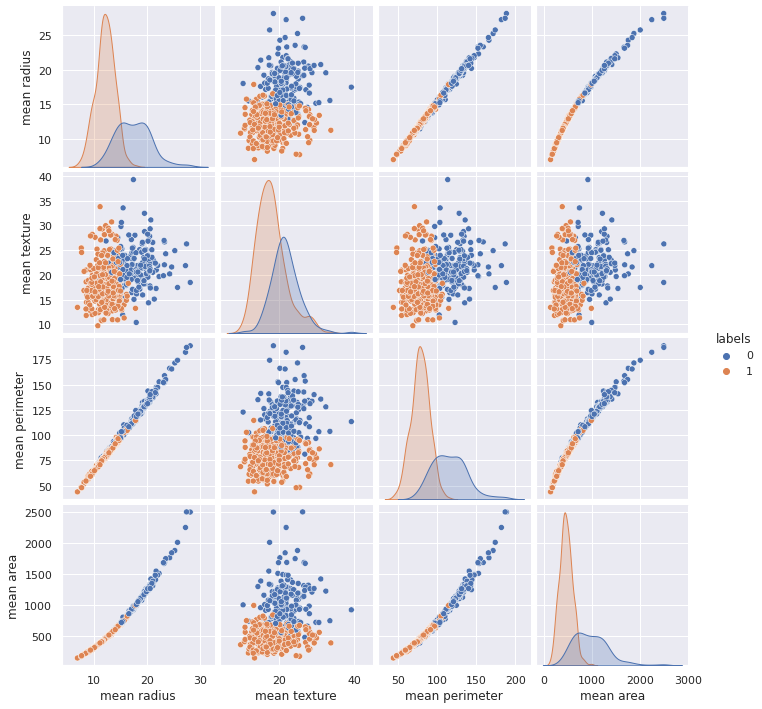

In [25]:
sns.pairplot(data = df[["mean radius","mean texture", "mean perimeter", "mean area" ,'labels']] ,hue='labels')


# plotting features to idinify realtion pattern and density 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


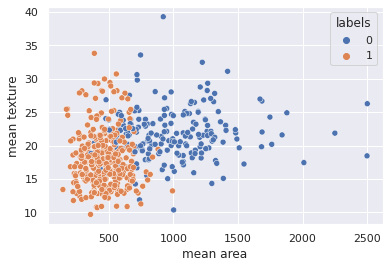

In [31]:
sns.scatterplot(df['mean area'] ,df['mean texture'] ,hue=df['labels']);

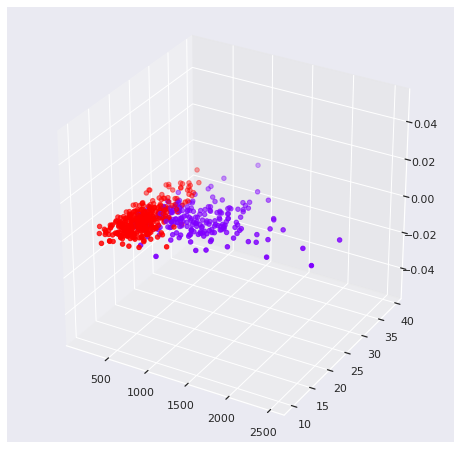

In [41]:
from mpl_toolkits.mplot3d import Axes3D
data_fig = plt.figure(figsize=(8, 8))  
ax = data_fig.add_subplot(111, projection ='3d')  
ax.scatter(df['mean area'], df['mean texture'] , marker ='o',c=df['labels'], cmap='rainbow') 
plt.show()

### Data Preprocessing

In [26]:
X = df[['mean area' ,'mean texture']].values

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

array([[ 0.9843749 , -2.07333501],
       [ 1.90870825, -0.35363241],
       [ 1.55888363,  0.45618695],
       ...,
       [ 0.57795264,  2.0455738 ],
       [ 1.73521799,  2.33645719],
       [-1.34778924,  1.22179204]])

In [44]:
scaled_X = scaler.fit_transform(X)

### Model Training & Prediction

In [54]:
from sklearn.neighbors import NearestNeighbors
neh = NearestNeighbors(n_neighbors=2)
Nneighbors = neh.fit(scaled_X)

In [58]:
distances, metrics = Nneighbors.kneighbors(scaled_X)
distances = np.sort(distances , axis=0)
distances

array([[0.        , 0.0028857 ],
       [0.        , 0.0028857 ],
       [0.        , 0.00511938],
       ...,
       [0.        , 1.06184887],
       [0.        , 1.24819901],
       [0.        , 1.42179086]])

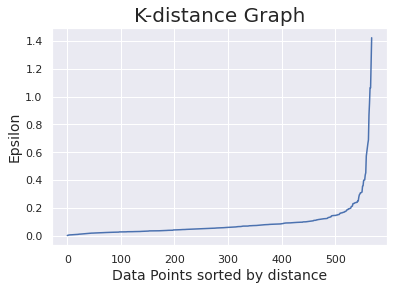

In [84]:
plt.plot(distances[: , 1])
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=.35)
model.fit_predict(scaled_X)

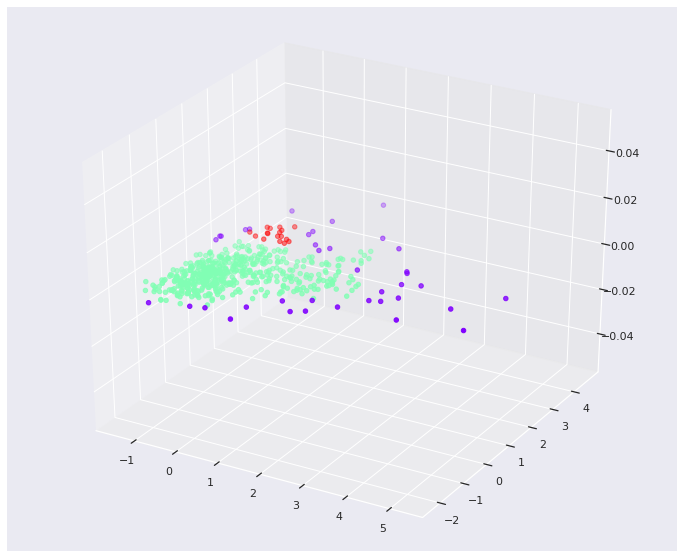

In [88]:
from mpl_toolkits.mplot3d import Axes3D
data_fig = plt.figure(figsize=(12, 10))  
ax = data_fig.add_subplot(111, projection ='3d')  
ax.scatter(scaled_X[:, 0], scaled_X[:, 1], marker ='o',c =model.labels_, cmap='rainbow') 
plt.show()

# KMeans 

In [ ]:
from sklearn.cluster import KMeans
cls = KMeans(n_clusters=2)
cls.fit_predict(scaled_X)

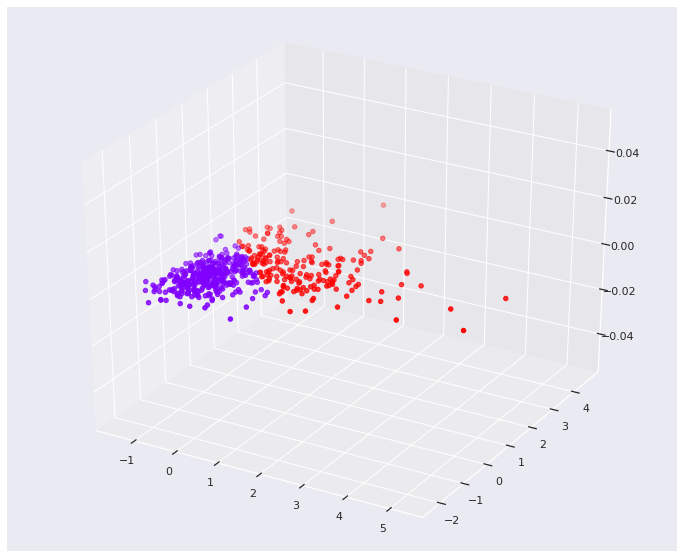

In [83]:
from mpl_toolkits.mplot3d import Axes3D
data_fig = plt.figure(figsize=(12, 10))  
ax = data_fig.add_subplot(111, projection ='3d')  
ax.scatter(scaled_X[:, 0], scaled_X[:, 1], marker ='o',c =cls.labels_, cmap='rainbow') 
plt.show()